In [1]:
library(data.table)

In [2]:
result_outrider <- fread("pred_no_na.txt")
#opt: encod_dim 17 noise factor 1
colnames(result_outrider)[1] <- "featureID"
dim(result_outrider)

Warning message in fread("pred_no_na.txt"):
“Detected 60 column names but the data has 61 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 6975   61

In [3]:
head(result_outrider)

featureID,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,23.82530,24.89250,23.46536,24.26511,24.99417,25.46808,23.91395,25.65536,23.57569,⋯,25.54598,26.19636,22.81692,24.31618,25.50504,25.56392,23.95363,25.12832,25.17307,25.84836
A0AV96;A0AV96-2,26.95893,28.67702,29.12149,29.22591,24.08905,27.47051,22.85227,32.45874,28.00763,⋯,25.51139,25.44076,26.48217,28.93228,29.98096,28.86376,26.97917,26.17529,25.60923,25.94243
A0AVF1;A0AVF1-2;A0AVF1-3,23.77847,24.47958,23.40375,26.09918,24.29845,24.66992,25.21604,24.20237,24.03991,⋯,25.57966,25.25518,26.65104,25.98517,23.99013,24.89343,25.10870,25.50019,24.60681,24.27626
A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,31.90762,31.70965,31.41251,32.39082,31.29363,32.02402,31.57607,31.04223,31.72583,⋯,31.48502,31.35044,31.52994,31.32385,31.54180,32.04987,31.81649,31.61414,30.10508,30.35830
A0FGR8-6;A0FGR8,29.53564,26.32843,26.11850,24.78599,26.70081,25.57264,27.98287,27.27502,26.03777,⋯,26.92745,26.57684,28.59774,26.38374,25.82347,25.27722,26.00291,25.33322,26.35553,24.34689
A0JLT2;A0JLT2-2,24.02672,25.56828,26.18665,24.93679,25.16909,25.26828,26.73343,25.75000,25.72822,⋯,25.08475,24.77894,25.33499,25.66370,26.69872,24.44849,25.86691,25.13800,25.44573,25.14074


In [4]:
measured <- read.table("prot_int.csv")
measured[measured != 0] <- 1
measured$featureID <- rownames(measured)
head(measured)

,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60,featureID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,1,1,1,1,0,1,1,1,1,1,⋯,1,1,1,1,1,0,1,1,1,P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
A0A0B4J2F0,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,A0A0B4J2F0
A0A0C4DH73,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,A0A0C4DH73
A0A5B9;P01850,0,0,0,0,0,0,1,0,1,0,⋯,0,1,0,0,0,0,1,0,1,A0A5B9;P01850
A0AV96;A0AV96-2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,A0AV96;A0AV96-2
A0AVF1;A0AVF1-2;A0AVF1-3,1,1,1,1,1,0,1,1,1,1,⋯,1,0,1,1,1,1,1,1,1,A0AVF1;A0AVF1-2;A0AVF1-3


In [5]:
prot_int_list <- melt(result_outrider)
colnames(prot_int_list)[2:3] <- c("sampleID","protein_intensity")
head(prot_int_list)

Warning message in melt.data.table(result_outrider):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [featureID, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


featureID,sampleID,protein_intensity
<chr>,<fct>,<dbl>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,X786O_NCI60,23.82530
A0AV96;A0AV96-2,X786O_NCI60,26.95893
A0AVF1;A0AVF1-2;A0AVF1-3,X786O_NCI60,23.77847
A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,X786O_NCI60,31.90762
A0FGR8-6;A0FGR8,X786O_NCI60,29.53564
A0JLT2;A0JLT2-2,X786O_NCI60,24.02672


In [6]:
measured_list <- melt(measured)
colnames(measured_list)[2:3] <- c("sampleID","measured")
head(measured_list)

Warning message in melt(measured):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(measured). In the next version, this warning will become an error.”
Using featureID as id variables



,featureID,sampleID,measured
,<chr>,<fct>,<dbl>
1,P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,X786O_NCI60,1
2,A0A0B4J2F0,X786O_NCI60,0
3,A0A0C4DH73,X786O_NCI60,0
4,A0A5B9;P01850,X786O_NCI60,0
5,A0AV96;A0AV96-2,X786O_NCI60,1
6,A0AVF1;A0AVF1-2;A0AVF1-3,X786O_NCI60,1


In [8]:
train <- merge(prot_int_list, measured_list)
head(train)

featureID,sampleID,protein_intensity,measured
<chr>,<fct>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O_NCI60,26.95893,1
A0AV96;A0AV96-2,A498_NCI60,28.67702,1
A0AV96;A0AV96-2,A549_NCI60,29.12149,1
A0AV96;A0AV96-2,ACHN_NCI60,29.22591,1
A0AV96;A0AV96-2,BT549_NCI60,24.08905,1
A0AV96;A0AV96-2,CAKI1_NCI60,27.47051,1


In [9]:
nrow(train)

[1] 418500

In [10]:
log_reg <- glm(measured~protein_intensity,family=binomial,data=train)

In [11]:
log_reg


Call:  glm(formula = measured ~ protein_intensity, family = binomial, 
    data = train)

Coefficients:
      (Intercept)  protein_intensity  
         -13.5550             0.6387  

Degrees of Freedom: 418499 Total (i.e. Null);  418498 Residual
Null Deviance:	    169400 
Residual Deviance: 131900 	AIC: 131900

In [12]:
train$predprob<-round(fitted(log_reg),2)

In [13]:
head(train)

featureID,sampleID,protein_intensity,measured,predprob
<chr>,<fct>,<dbl>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O_NCI60,26.95893,1,0.97
A0AV96;A0AV96-2,A498_NCI60,28.67702,1,0.99
A0AV96;A0AV96-2,A549_NCI60,29.12149,1,0.99
A0AV96;A0AV96-2,ACHN_NCI60,29.22591,1,0.99
A0AV96;A0AV96-2,BT549_NCI60,24.08905,1,0.86
A0AV96;A0AV96-2,CAKI1_NCI60,27.47051,1,0.98


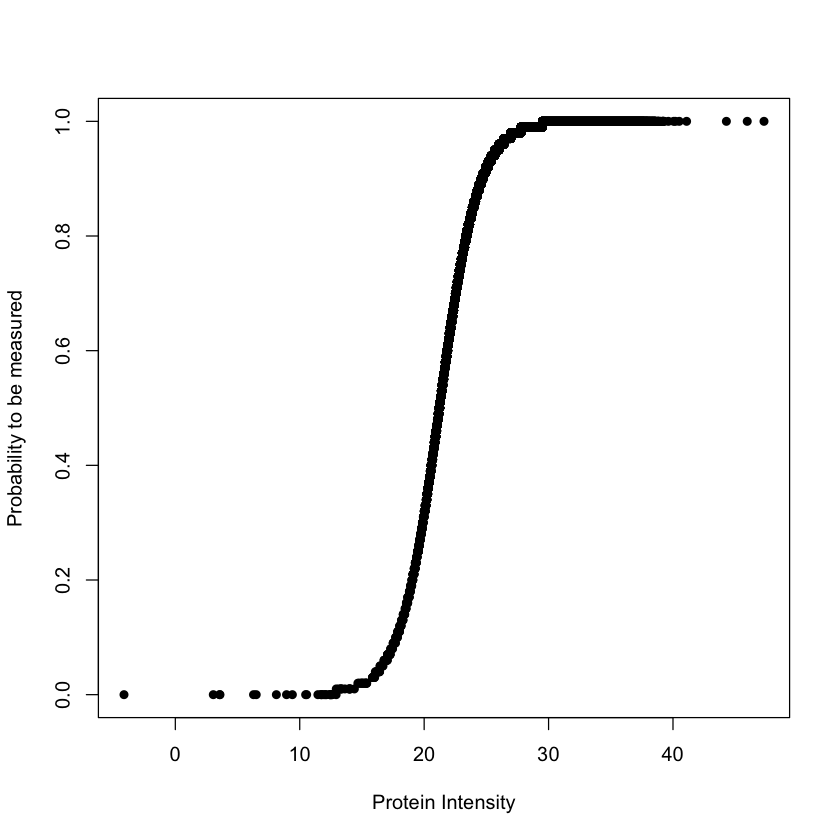

In [14]:
plot(train$protein_intensity, train$predprob, pch = 16, cex = 1, ylab = "Probability to be measured", xlab = "Protein Intensity")

In [17]:
train$missing <- 1- train$predprob

In [18]:
head(train)

featureID,sampleID,protein_intensity,measured,predprob,missing
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O_NCI60,26.95893,1,0.97,0.03
A0AV96;A0AV96-2,A498_NCI60,28.67702,1,0.99,0.01
A0AV96;A0AV96-2,A549_NCI60,29.12149,1,0.99,0.01
A0AV96;A0AV96-2,ACHN_NCI60,29.22591,1,0.99,0.01
A0AV96;A0AV96-2,BT549_NCI60,24.08905,1,0.86,0.14
A0AV96;A0AV96-2,CAKI1_NCI60,27.47051,1,0.98,0.02


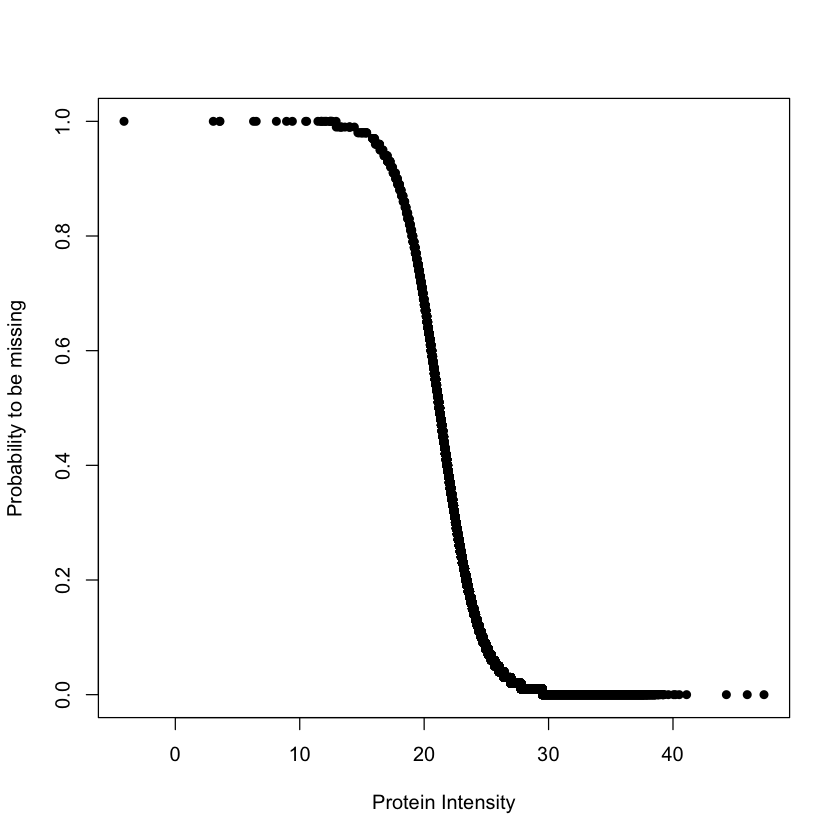

In [20]:
plot(train$protein_intensity, train$missing, pch = 16, cex = 1, ylab = "Probability to be missing", xlab = "Protein Intensity")

In [16]:
summary(log_reg)


Call:
glm(formula = measured ~ protein_intensity, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7732   0.0848   0.1765   0.3303   2.1366  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.55501    0.10194  -133.0   <2e-16 ***
protein_intensity   0.63870    0.00413   154.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 169375  on 418499  degrees of freedom
Residual deviance: 131939  on 418498  degrees of freedom
AIC: 131943

Number of Fisher Scoring iterations: 7
